In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('bank_data.csv')

In [7]:
df.head()

,id,expected_recovery_amount,actual_recovery_amount,recovery_strategy,age,sex
0,2030,194,263.540,Level 0 Recovery,19,Male
1,1150,486,416.090,Level 0 Recovery,25,Female
2,380,527,429.350,Level 0 Recovery,27,Male
3,1838,536,296.990,Level 0 Recovery,25,Male
4,1995,541,346.385,Level 0 Recovery,34,Male


# Statistical test: age vs. expected recovery amount

In [9]:
# Filter data for the specified Expected Recovery Amount range ($0 - $2000)

In [20]:
df_subset = df[(df['expected_recovery_amount'] >= 0) & (df['expected_recovery_amount'] <= 2000)]

In [13]:
# Create a scatter plot

In [21]:
import matplotlib.pyplot as plt
import pandas as pd

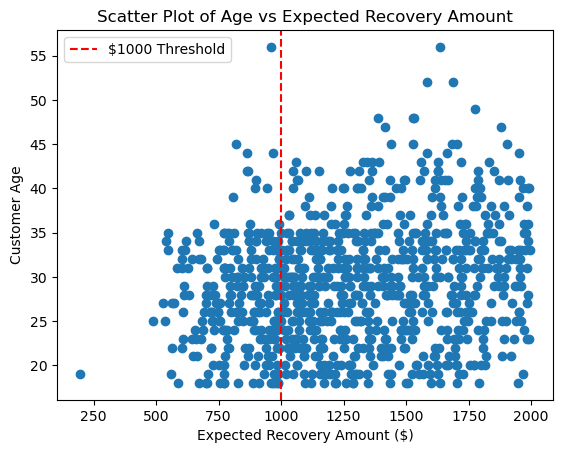

In [24]:
plt.scatter(df_subset['expected_recovery_amount'], df_subset['age'], alpha=1.0)
plt.xlabel('Expected Recovery Amount ($)')
plt.ylabel('Customer Age')
plt.title('Scatter Plot of Age vs Expected Recovery Amount')
# Add a horizontal line at the $1000 threshold for reference
plt.axvline(x=1000, color='red', linestyle='--', label='$1000 Threshold')
plt.legend()
plt.show()

In [ ]:
# Near the threshold of $1000, there isn't any specific jump in age, hence age varies smoothly near threshold

In [ ]:
# Filter data for the specified Expected Recovery Amount range ($900 - $1100)

In [22]:
df_subset2 = df[(df['expected_recovery_amount'] >= 900) & (df['expected_recovery_amount'] <= 1100)]

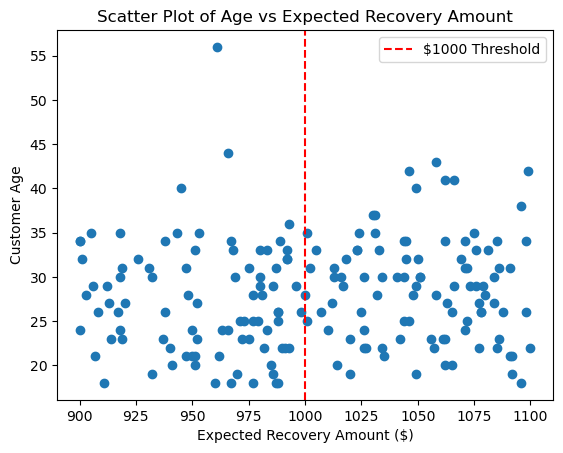

In [9]:
plt.scatter(df_subset2['expected_recovery_amount'], df_subset2['age'], alpha=1.0)
plt.xlabel('Expected Recovery Amount ($)')
plt.ylabel('Customer Age')
plt.title('Scatter Plot of Age vs Expected Recovery Amount')
# Add a horizontal line at the $1000 threshold for reference
plt.axvline(x=1000, color='red', linestyle='--', label='$1000 Threshold')
plt.legend()
plt.show()

# Statistical test: sex vs. expected recovery amount

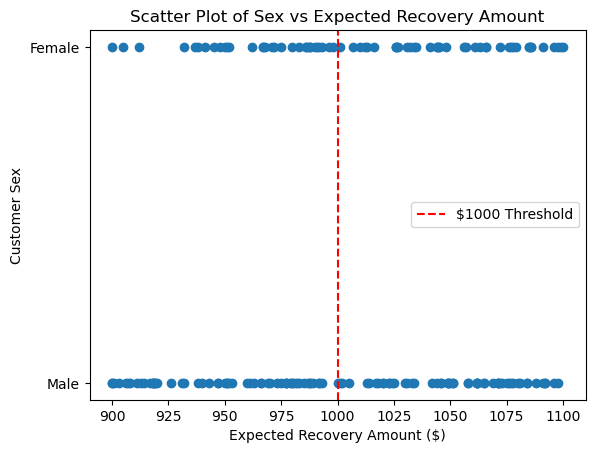

In [11]:
plt.scatter(df_subset2['expected_recovery_amount'], df_subset2['sex'], alpha=1.0)
plt.xlabel('Expected Recovery Amount ($)')
plt.ylabel('Customer Sex')
plt.title('Scatter Plot of Sex vs Expected Recovery Amount')
# Add a horizontal line at the $1000 threshold for reference
plt.axvline(x=1000, color='red', linestyle='--', label='$1000 Threshold')
plt.legend()
plt.show()

C:\Users\cedcoss\AppData\Local\Temp\ipykernel_21972\864165515.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='expected_recovery_amount', y=df_subset_gender['sex'].map({'Male': 1, 'Female': 0}), data=df_subset_gender, ci=None)


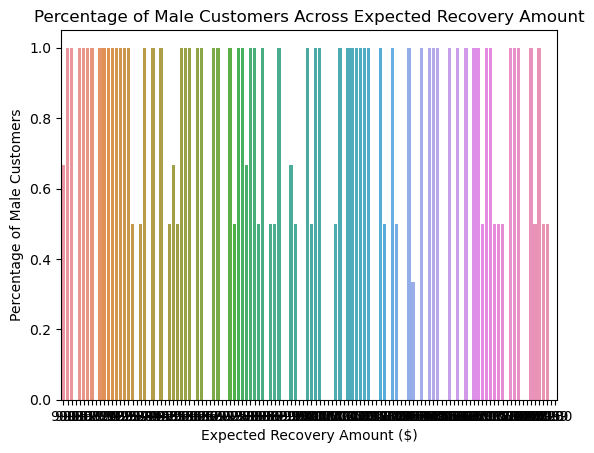

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data for the specified Expected Recovery Amount range
df_subset_gender = df[(df['expected_recovery_amount'] >= 900) & (df['expected_recovery_amount'] <= 1100)]

# Create a bar plot for the percentage of male customers
sns.barplot(x='expected_recovery_amount', y=df_subset_gender['sex'].map({'Male': 1, 'Female': 0}), data=df_subset_gender, ci=None)
plt.xlabel('Expected Recovery Amount ($)')
plt.ylabel('Percentage of Male Customers')
plt.title('Percentage of Male Customers Across Expected Recovery Amount')
plt.show()

In [ ]:
# Percentage of male customers also does not show any jump near threshold

# Exploratory graphical analysis: recovery amount

In [ ]:
# Filter data for the specified Expected Recovery Amount range ($900 - $1100)

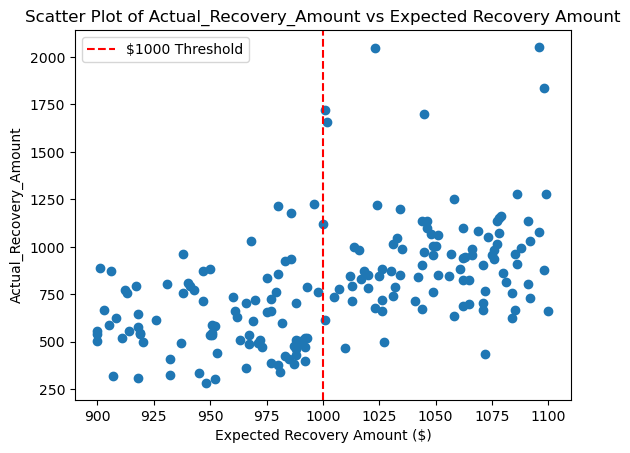

In [16]:
plt.scatter(df_subset2['expected_recovery_amount'], df_subset2['actual_recovery_amount'], alpha=1.0)
plt.xlabel('Expected Recovery Amount ($)')
plt.ylabel('Actual_Recovery_Amount')
plt.title('Scatter Plot of Actual_Recovery_Amount vs Expected Recovery Amount')
# Add a horizontal line at the $1000 threshold for reference
plt.axvline(x=1000, color='red', linestyle='--', label='$1000 Threshold')
plt.legend()
plt.show()

In [ ]:
# Filter data for the specified Expected Recovery Amount range ($950 - $1050)

In [23]:
df_subset3 = df[(df['expected_recovery_amount'] >= 950) & (df['expected_recovery_amount'] <= 1050)]

In [ ]:
# Statistical analysis: recovery amount (Kruskal Wallis test)

In [25]:
import pandas as pd
from scipy.stats import kruskal

# Assuming df is your DataFrame with columns 'Expected_Recovery_Amount' and 'Actual_Recovery_Amount'
# Filter data for the specified Expected Recovery Amount windows
# Perform Kruskal-Wallis test
statistic1, p_value1 = kruskal(df_subset2['actual_recovery_amount'], df_subset3['actual_recovery_amount'])

# Display the results
print(f"Kruskal-Wallis Test Results (Window 1):")
print(f"Statistic: {statistic1}")
print(f"P-value: {p_value1}")

# Interpret the results
if p_value1 < 0.05:
    print("There is a statistically significant difference in actual recovery amounts within Window 1.")
else:
    print("There is no statistically significant difference in actual recovery amounts within Window 1.")

# Perform Kruskal-Wallis test for Window 2
statistic2, p_value2 = kruskal(df_subset3['actual_recovery_amount'])

# Display the results
print(f"\nKruskal-Wallis Test Results (Window 2):")
print(f"Statistic: {statistic2}")
print(f"P-value: {p_value2}")

# Interpret the results
if p_value2 < 0.05:
    print("There is a statistically significant difference in actual recovery amounts within Window 2.")
else:
    print("There is no statistically significant difference in actual recovery amounts within Window 2.")

Kruskal-Wallis Test Results (Window 1):
Statistic: 0.823820206138487
P-value: 0.36406558976551284
There is no statistically significant difference in actual recovery amounts within Window 1.


ValueError: Need at least two groups in stats.kruskal()

# Regression modeling: no threshold

Mean Squared Error (Model without Threshold): 4141175.5302995024


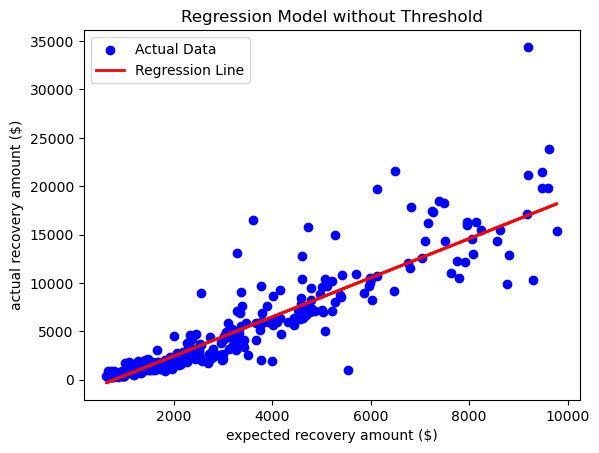

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with columns 'Expected_Recovery_Amount' and 'Actual_Recovery_Amount'
# and you want to build a model for the data around the $1000 threshold

# Extract relevant columns
X = df['expected_recovery_amount'].values.reshape(-1, 1)  # Independent variable
y = df['actual_recovery_amount'].values  # Dependent variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a linear regression model
model_no_threshold = LinearRegression()
model_no_threshold.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model_no_threshold.predict(X_test)

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (Model without Threshold): {mse}")

# Visualize the regression line
plt.scatter(X_test, y_test, color='blue', label='Actual Data')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel('expected recovery amount ($)')
plt.ylabel('actual recovery amount ($)')
plt.title('Regression Model without Threshold')
plt.legend()
plt.show()

# Regression modeling: adding true threshold

Mean Squared Error (Model with Threshold): 4094318.061011375


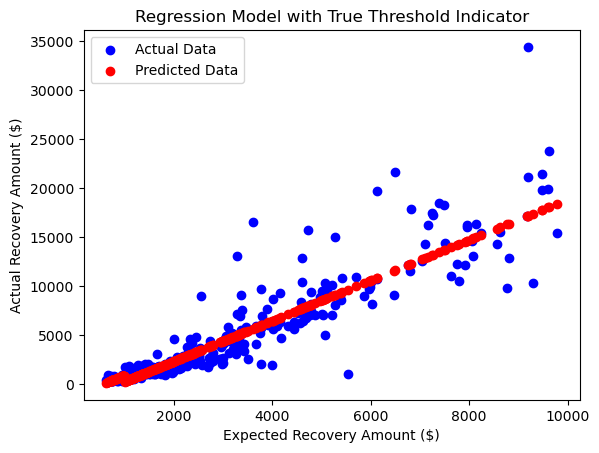

In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with columns 'Expected_Recovery_Amount' and 'Actual_Recovery_Amount'

# Add a dummy variable for the true threshold
df['Above_Threshold'] = np.where(df['expected_recovery_amount'] > 1000, 1, 0)

# Extract relevant columns
X_with_threshold = df[['expected_recovery_amount', 'Above_Threshold']]
y = df['actual_recovery_amount']

# Split the data into training and testing sets
X_train_with_threshold, X_test_with_threshold, y_train, y_test = train_test_split(X_with_threshold, y, test_size=0.2, random_state=42)

# Build a linear regression model with the true threshold indicator
model_with_threshold = LinearRegression()
model_with_threshold.fit(X_train_with_threshold, y_train)

# Make predictions on the test set
y_pred_with_threshold = model_with_threshold.predict(X_test_with_threshold)

# Evaluate the model performance
mse_with_threshold = mean_squared_error(y_test, y_pred_with_threshold)
print(f"Mean Squared Error (Model with Threshold): {mse_with_threshold}")

# Visualize the regression line
plt.scatter(X_test_with_threshold['expected_recovery_amount'], y_test, color='blue', label='Actual Data')
plt.scatter(X_test_with_threshold['expected_recovery_amount'], y_pred_with_threshold, color='red', label='Predicted Data')
plt.xlabel('Expected Recovery Amount ($)')
plt.ylabel('Actual Recovery Amount ($)')
plt.title('Regression Model with True Threshold Indicator')
plt.legend()
plt.show()

In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assuming df is your DataFrame with columns 'Expected_Recovery_Amount' and 'Actual_Recovery_Amount'

# Add a dummy variable for the true threshold
df['Above_Threshold'] = np.where(df['expected_recovery_amount'] > 1000, 1, 0)

# Define the new window
lower_bound = 950
upper_bound = 1050

# Filter data for the specified Expected Recovery Amount window
df_window = df[(df['expected_recovery_amount'] >= lower_bound) & (df['expected_recovery_amount'] <= upper_bound)]

# Extract relevant columns
X_with_threshold = df_window[['expected_recovery_amount', 'Above_Threshold']]
y = df_window['actual_recovery_amount']

# Split the data into training and testing sets
X_train_with_threshold, X_test_with_threshold, y_train, y_test = train_test_split(X_with_threshold, y, test_size=0.2, random_state=42)

# Build a linear regression model with the true threshold indicator
model_with_threshold = LinearRegression()
model_with_threshold.fit(X_train_with_threshold, y_train)

# Make predictions on the test set
y_pred_with_threshold = model_with_threshold.predict(X_test_with_threshold)

# Evaluate the model performance
mse_with_threshold = mean_squared_error(y_test, y_pred_with_threshold)
print(f"Mean Squared Error (Model with Threshold): {mse_with_threshold}")

# Display the regression coefficient and its confidence interval
coeff = model_with_threshold.coef_[1]  # Coefficient for 'Above_Threshold'
conf_interval = [coeff - 1.96 * np.std(y_test), coeff + 1.96 * np.std(y_test)]
print(f"Regression Coefficient for True Threshold: {coeff}")
print(f"95% Confidence Interval: {conf_interval}")

Mean Squared Error (Model with Threshold): 62537.34929510499
Regression Coefficient for True Threshold: 241.20146500589328
95% Confidence Interval: [-223.07552366714924, 705.4784536789358]
